In [1]:
import numpy as np 
import emcee
import neuron
from neuron import h, gui
import time
import time
from scipy import signal
import matplotlib
from matplotlib import pyplot
import pandas as pd
%matplotlib inline


/Users/hk4cd/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


('IAPP ALL element 44:', 304998)
-65.7 -9.76 0.02 4.552 41.67 -37.85 9.16 0.388 0.012 5.0 -21.0 7.561 0.34 8.556 20.11


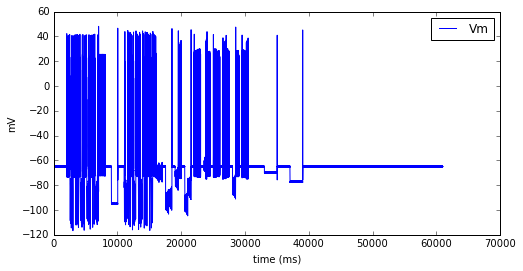

In [2]:
## Creating 'data' neuron
soma = h.Section()


soma.L = soma.diam = 12.6157
soma.nseg = 3

soma.cm = 1.0
soma.Ra = 35.399999999999999

soma.insert('hh')
soma.insert('Na_T')
soma.insert('leak')
soma.insert('K1')

soma.gl_hh = 0.0003    # Leak conductance in S/cm2
soma.el_hh = -54.3     # Reversal potential in mV

soma.gnabar_Na_T = .12 # Standard conductance values 
soma.gkbar_K1 = .606
soma.g_leak = .0003

## Default paramter values

stim = h.IClamp(0.5,soma)
time = h.Vector([])
time.record(h._ref_t)

ipath = '20120406_1_3_15i.dat'
iapp_all = np.loadtxt(ipath)

tiktok = np.arange(0, 304998, 0.2)


print ('IAPP ALL element 44:', iapp_all.size)

##VecT = h.Vector([0, 100, 200, 300, 400, 500])
##VecStim = h.Vector([0.2, 0.6, 0.8, 1.0])

VecT = h.Vector()
VecStim = h.Vector()

VecT = VecT.from_python(tiktok) 
VecStim = VecStim.from_python(iapp_all)

stim.delay = 5
stim.dur = 1e9

VecStim.play(stim._ref_amp, VecT) # applying current 

v_vec = h.Vector() # Membrane potential vector
t_vec = h.Vector() # Time stamp vector

t_vec.record(h._ref_t)
v_vec.record(soma(0.5)._ref_v)

simdur = 60999.6 

h.tstop = simdur
h.run()


print h.Vhalfh_Na_T, h.kh_Na_T, h.tauInith_Na_T, h.tauMaxh_Na_T, h.sigmah_Na_T, h.Vhalfm_Na_T, h.km_Na_T, h.tauInitm_Na_T, h.tauMaxm_Na_T, h.sigmam_Na_T, h.k1Vhalfm_K1, h.k1km_K1, h.k1tauInitm_K1, h.k1tauMaxm_K1, h.k1sigmam_K1 
i = 0

print v_vec
pyplot.figure(figsize=(8,4)) # Default figsize is (8,6)
pyplot.plot(t_vec, v_vec, label = 'Vm')
pyplot.legend(loc='upper right')
pyplot.xlabel('time (ms)')
pyplot.ylabel('mV')
pyplot.show() 
 
 
 
 

In [6]:
def quickGR(chain):             ## gives convergence values. If closer to 1, more converged
    M,N,P = np.shape(chain)
    W = B = 0
    R = np.zeros(P)
    for i in range(0,P):
        W = np.mean(np.var(chain[:,:,i],1,ddof=1))
        B = N*np.var(np.mean(chain[:,:,i],1),ddof=1)
        R[i] = np.sqrt(((1-1/N)*W + B/N)/W)
    return R

def lnprior(theta):
    h.Vhalfh_Na_T, h.kh_Na_T, h.tauInith_Na_T, h.tauMaxh_Na_T, h.sigmah_Na_T, h.Vhalfm_Na_T, h.km_Na_T, h.tauInitm_Na_T, h.tauMaxm_Na_T, h.sigmam_Na_T, h.k1Vhalfm_K1, h.k1km_K1, h.k1tauInitm_K1, h.k1tauMaxm_K1, h.k1sigmam_K1 = theta
    # bounds on the uniform prior distributions.
    if (   
             -105 < h.Vhalfh_Na_T < -25 and 
             -30 < h.kh_Na_T < 10 and
             -2 < h.tauInith_Na_T < 2 and 
             -15 < h.tauMaxh_Na_T < 20  and
             0 < h.sigmah_Na_T < 80  and
           
             -80 < h.Vhalfm_Na_T  < 0 and
             -30 < h.km_Na_T < 40 and  
             -1 < h.tauInitm_Na_T < 1.5 and
             -1 < h.tauMaxm_Na_T < 1.5 and
             -5< h.sigmam_Na_T < 15 and
        
             -60 < h.k1Vhalfm_K1  < 40 and
             -10 < h.k1km_K1 < 20 and  
             -2 < h.k1tauInitm_K1 < 2 and
             0 < h.k1tauMaxm_K1 < 20 and
             0 < h.k1sigmam_K1 < 40
       ):
            return 0.0
      
    return -np.inf


def lnlike(theta, data):
    
    h.Vhalfh_Na_T, h.kh_Na_T, h.tauInith_Na_T, h.tauMaxh_Na_T, h.sigmah_Na_T, h.Vhalfm_Na_T, h.km_Na_T, h.tauInitm_Na_T, h.tauMaxm_Na_T, h.sigmam_Na_T, h.k1Vhalfm_K1, h.k1km_K1, h.k1tauInitm_K1, h.k1tauMaxm_K1, h.k1sigmam_K1 = theta
    
    assertVec = np.array([h.Vhalfh_Na_T, h.kh_Na_T, h.tauInith_Na_T, h.tauMaxh_Na_T, h.sigmah_Na_T, h.Vhalfm_Na_T, h.km_Na_T, h.tauInitm_Na_T, h.tauMaxm_Na_T, h.sigmam_Na_T, h.k1Vhalfm_K1, h.k1km_K1, h.k1tauInitm_K1, h.k1tauMaxm_K1, h.k1sigmam_K1])
    
   
    
    ##assertCopy = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
    ##assertCopy = np.copy(assertVec)
    
    
    # integrating the model with parameters sample
    # Note: Parameters a and b are fixed because they determine spike shape, 
    #       which is irrelevant to the SPIKE sync cost function. I fixed the
    #       parameters to values I know would produce a standard spike shape.
    

    # Setup for applying current
    
    stim = h.IClamp(0.5,soma)
    time = h.Vector()
    time.record(h._ref_t)

    VecT = h.Vector()
    VecStim = h.Vector()

    VecT = VecT.from_python(tiktok) 
    VecStim = VecStim.from_python(iapp_all)
    
    
    stim.delay = 5
    stim.dur = 1e9

    # Applying current
    
    VecStim.play(stim._ref_amp, VecT) 
    
    vnew_vec = h.Vector() # NEW Membrane potential vector
    t_vec = h.Vector() # Time stamp vector

    t_vec.record(h._ref_t)
    vnew_vec.record(soma(0.5)._ref_v)
    
    

    simdur = 60999.6

    
    h.tstop = simdur
    
    # Running the simulation, recording model data
    
    print ('AssertVec2: ', assertVec)
    ##print ('copyVec2: ', assertCopy[2]) 
    
    h.run()
    
    print ('AssertVec2 post run: ', assertVec)
    print (" ")
    ##print ('copyVec2 post run: ', assertCopy[2])
    
    ##assert (assertVec.all() == assertCopy.all()); print ('Threading interference!') 
    
   
    model = vnew_vec
    
    ## Finding the least mean square values by subtracting model data from actual data,
    ## squaring the vector values, summing the vector values into "out", returning -out
    
    lms_vec = h.Vector()
    out = 0
    z = 0
    modelp = model.to_python();  

            
    
    ##print ('Data:', data.size);
    ##print ('Model:', modelp.size);
   
    
    
    lms_vec = np.subtract(data, modelp)
   
    lms_vec = lms_vec[np.logical_not(np.isnan(lms_vec))]
    ##print ('Difference vec w/out nan', lms_vec)
    out = np.square(lms_vec)
    
    sout = np.sum(out)
    ##print ('LMS vec, squared ', out)
    print ('LMS vec, squared, summed: ', sout)
    return -sout

# probability of the paramters given the data
def lnprob(theta, data):
    
    # calculate prior probability of parameter values
    lp = lnprior(theta)
    
    # throw out sample if parameters are out of bounds
    if not np.isfinite(lp):
        return -np.inf
    
    # calculate likelihood of the data given the parameters
    ln = lnlike(theta, data)
    ##print ln

    
    if (ln==ln):
        return lp + ln
    else:
        return -np.inf


########################################

In [7]:
### MAIN MCMC CELL ##################################################################################################

# setting the number of walkers
ndim, nwalkers = 15, 500

# setting a starting point in parameter space (ONLY FOR BALL METHOD) 

##start = [ -65.7, -9.76, .02, 4.552, 41.67, -37.85, 9.16, .388, .012, 5.0, -21, 7.561, 20.11, .34, 8.556]
pos = np.concatenate((np.random.uniform(-105,-25,(nwalkers,1)) ,
                        np.random.uniform(-30, 10,(nwalkers,1)),
                        np.random.uniform(-2, 2, (nwalkers,1)),
                        np.random.uniform(-15, 20, (nwalkers,1)),
                        np.random.uniform(0, 80, (nwalkers,1)),
                        np.random.uniform(-80, 0, (nwalkers,1)),
                        np.random.uniform(-30, 40, (nwalkers,1)),
                        np.random.uniform(-1, 1.5, (nwalkers,1)),
                        np.random.uniform(-1, 1.5, (nwalkers,1)),
                        np.random.uniform(-5, 15,(nwalkers,1)),
                        np.random.uniform(-60, 40,(nwalkers,1)),
                        np.random.uniform(-10, 20,(nwalkers,1)),
                        np.random.uniform(-2, 2,(nwalkers,1)),
                        np.random.uniform(0, 20,(nwalkers,1)),
                        np.random.uniform(0, 40,(nwalkers,1))),1)


# creating a ball of walkers around the starting point

#pos = emcee.utils.sample_ball(start,[2]*len(start),size=nwalkers)

# create walker positions evenly spread across parameter space. Essentially creates starting points from within prior 
# bounds

'''
pos = np.concatenate((np.random.uniform(1.0,500,(nwalkers,1)) ,
                        np.random.uniform(0.0 , 30.0, (nwalkers,1)),
                        np.random.uniform(-120, -20, (nwalkers,1)),
                        np.random.uniform(0.1, 10, (nwalkers,1)),
                        np.random.uniform(-70, 0, (nwalkers,1)),
                        np.random.uniform(10, 210, (nwalkers,1)),
                        np.random.uniform(-10, 10  , (nwalkers,1)),
                        np.random.uniform(-80.0, 0, (nwalkers,1)),
                        np.random.uniform(0,500,(nwalkers,1))),1)
'''

# setting up the sampler to run in parallel on 12 cores

print ('element 45 from old voltage vec, v_vec, pre emcee:' , v_vec[45])
vcopy = np.copy(v_vec)
print vcopy
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[vcopy])

'''
%time pos, prob, state = sampler.run_mcmc(pos,500,storechain=True)
maxlik = sampler.flatchain[sampler.flatlnprobability.argmax()]
THIN = int(max(sampler.acor))
print("Thin factor:")
print(THIN)
print("Maximum Likelihood:")
print(maxlik)
print("quickGR:")
print(quickGR(sampler.chain))
print("Acceptance:")
print(np.mean(sampler.acceptance_fraction))
'''

THIN=10


sampler.reset()

# burning in th chains (are these only "burn" values?)
%time pos2, prob, state = sampler.run_mcmc(pos, 20*THIN,storechain=True)
print("Finished burning")
print("quickGR:")
print(quickGR(sampler.chain))
print("Acceptance:")
print(np.mean(sampler.acceptance_fraction))
sampler.reset()

print(" ")

# sampling the posterior distribution of the parameters.
%time pos3, prob2, state2 = sampler.run_mcmc(pos2, 1, storechain=True)
print("Finished Sampling")
print(quickGR(sampler.chain))
print("Acceptance:")
print(np.mean(sampler.acceptance_fraction))

('element 45 from old voltage vec, v_vec, pre emcee:', 49.999999972393944)
[-65.          13.88267332  41.40754178 ...,          nan          nan
          nan]
('AssertVec2: ', array([-64.01363931, -19.33197052,   1.6843471 ,  -8.71690943,
         3.0807768 ,  -7.14357506,  16.48924218,   0.16465045,
        -0.65544415,  -1.48127338, -32.56194508,  -6.90624853,
        -1.8132162 ,  18.80577546,   1.93324819]))
('AssertVec2 post run: ', array([-64.01363931, -19.33197052,   1.6843471 ,  -8.71690943,
         3.0807768 ,  -7.14357506,  16.48924218,   0.16465045,
        -0.65544415,  -1.48127338, -32.56194508,  -6.90624853,
        -1.8132162 ,  18.80577546,   1.93324819]))
 
('LMS vec, squared, summed: ', 24724517.240749694)
('AssertVec2: ', array([ -8.69561571e+01,  -2.92881822e+01,  -5.59861814e-01,
         2.23317033e+00,   6.62656515e+01,  -5.60463247e+01,
        -1.20766865e+01,   5.53018007e-01,  -2.01100142e-01,
         2.46829809e-01,  -9.67307961e+00,   1.71832784e+01,
  

Traceback (most recent call last):
  File "/Users/hk4cd/anaconda/envs/py27/lib/python2.7/site-packages/emcee/ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-6-11c0cf235e12>", line 142, in lnprob
    ln = lnlike(theta, data)
  File "<ipython-input-6-11c0cf235e12>", line 94, in lnlike
    h.run()
KeyboardInterrupt


KeyboardInterrupt: 

In [23]:
print sampler.flatchain
print sampler.chain

[]
[]


In [23]:
# load plotting packages
from matplotlib.pyplot import * # plotting package
##import seaborn as sns          # data visualization package
import pandas as pd            # data analysis and manipulation package

# tell IPython to show plots in the notebook
%matplotlib inline

# set up the plots to look not awful
##clr_plt = sns.color_palette('cubehelix',4)
##sns.set_style('white')

# put the MCMC trace into nice and tidy dataframe
mcmc_samples = pd.DataFrame(sampler.flatchain, columns = ["Vhalfh_Na_T", "kh_Na_T", "tauInith_Na_T", "tauMaxh_Na_T", "sigmah_Na_T", "Vhalfm_Na_T", "km_Na_T", "tauInitm_Na_T", "tauMaxm_Na_T", "sigmam_Na_T", "k1Vhalfm_K1", "k1km_K1", "k1tauInitm_K1", "k1tauMaxm_K1", "k1sigmam_K1"])
mcmc_samples = np.round(mcmc_samples,2)

# plot a histogram of samples
hists = mcmc_samples.hist(bins=100,figsize=(16, 8),normed=True,grid='off')
jointHist = np.histogram2d(sampler.flatchain[:,1],sampler.flatchain[:,3], bins = 300)

# remove ugly and useless spines
##sns.despine()

KeyboardInterrupt: 

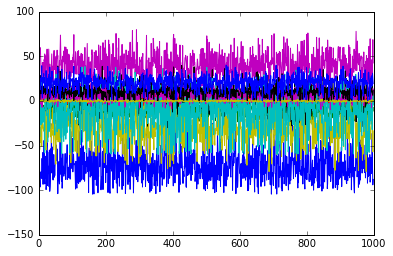

In [27]:
plot(sampler.flatchain)
